C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Going for Logistic regression:  
150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy is :
0.96
Going for K neighbor with n = 5 :  
150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy is :
0.966666666667
Going for K neighbor with n = 1 :  
150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 

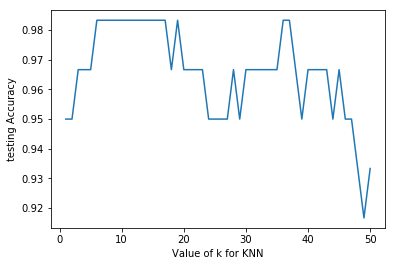

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split


iris = load_iris()
X = iris.data
y = iris.target

print("Going for Logistic regression:  ")

logreg = LogisticRegression()
logreg.fit(X,y)
yLogisticRegressionPredict = logreg.predict(X)
print(len(yLogisticRegressionPredict))
print(yLogisticRegressionPredict)
print("Accuracy is :")
#Training Accuracy
print(metrics.accuracy_score(y,yLogisticRegressionPredict)) #ans = 0.96

print("Going for K neighbor with n = 5 :  ")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
yKNNWith5 = knn.predict(X)
print(len(yKNNWith5))
print(yKNNWith5)
print("Accuracy is :")
#Training Accuracy
print(metrics.accuracy_score(y,yKNNWith5)) #ans = 0.966666666667

print("Going for K neighbor with n = 1 :  ")

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
yKNNWith1 = knn.predict(X)
print(len(yKNNWith1))
print(yKNNWith1)
print("Accuracy is :")
#Training Accuracy
print(metrics.accuracy_score(y,yKNNWith1)) #ans = 1.0

#Method 2 : Train/Test Split
print("Spliting data into train and test")

XTrain,XTest,yTrain,yTest = train_test_split(X,y,test_size = 0.4,random_state=4)#test_size assigns no. of observations to test data

print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

logreg.fit(XTrain,yTrain)
yLogisticRegressionPredict = logreg.predict(XTest)
print("Accuracy is :")
#Testing Accuracy
print(metrics.accuracy_score(yTest,yLogisticRegressionPredict)) #ans = 0.95

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XTrain,yTrain)
yKNNWith5 = knn.predict(XTest)
print("Accuracy is :")
#Testing Accuracy
print(metrics.accuracy_score(yTest,yKNNWith5)) #ans = 0.966666666667

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(XTrain,yTrain)
yKNNWith1 = knn.predict(XTest)
print("Accuracy is :")
#Testing Accuracy
print(metrics.accuracy_score(yTest,yKNNWith1)) #ans = 0.95

#Trying out k value from 1 to 50
k_range = range(1,51)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(XTrain,yTrain)
    yKNNWith1 = knn.predict(XTest)
    scores.append(metrics.accuracy_score(yTest,yKNNWith1))

plt.plot(k_range,scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("testing Accuracy")

#out of sample data
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X,y)
predictInput = np.array([3,5,4,2])
predictInput = predictInput.reshape(1,-1)

yPredict = knn.predict(predictInput)
print(yPredict)